# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sml

In [2]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

In [2]:
athletes = pd.read_csv("dados/athletes.csv")

In [3]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.


In [6]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [7]:
athletes.shape

(11538, 11)

In [4]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [5]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [6]:
def q1():
    # Retorne aqui o resultado da questão 1.
    amostra_altura = get_sample(athletes, 'height', n=3000)
    
    p_valor = sct.shapiro(amostra_altura)[1]
    significancia = 0.05
    
    return p_valor > significancia

In [7]:
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

**Resposta** Sim, é visivel que a amostra seguem uma distribuíção normal
* Plote o qq-plot para essa variável e a analise.

**Resposta** Segue abaixo
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

**Resposta** Sim, um nível de siginificância maior que 15% resultaria em uma distribuição não normal

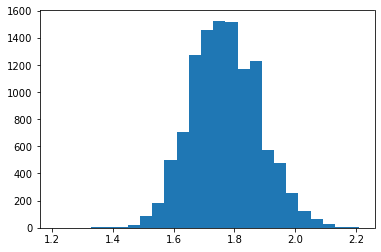

In [9]:
plt.hist(athletes['height'], bins=25);

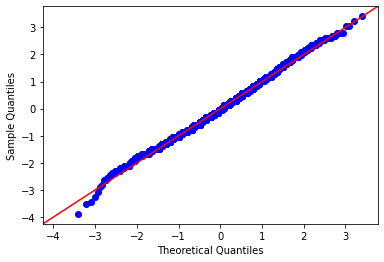

In [13]:
amostra_altura = get_sample(athletes, 'height', n=3000)
sml.qqplot(amostra_altura, fit=True, line='45');

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [8]:
def q2():
    # Retorne aqui o resultado da questão 2.
    amostra_altura = get_sample(athletes, 'height', n=3000)
    
    p_valor = sct.jarque_bera(amostra_altura)[1]
    significancia = 0.05
    
    return p_valor > significancia

In [9]:
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

**Resposta** Sim

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [11]:
def q3():
    # Retorne aqui o resultado da questão 3.
    amostra_peso = get_sample(athletes, 'weight', n=3000)
    
    p_valor = sct.normaltest(amostra_peso)[1]
    significancia = 0.05
    
    return p_valor > significancia

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

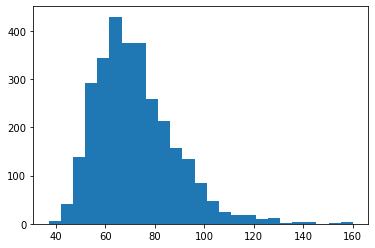

In [14]:
amostra_peso = get_sample(athletes, 'weight', n=3000)
plt.hist(x=amostra_peso, bins=25);

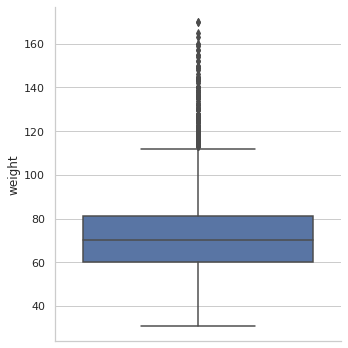

In [20]:
box=sns.catplot(y='weight', data=athletes, kind='box', aspect=1 )
plt.show()

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [13]:
def q4():
    # Retorne aqui o resultado da questão 4.
    amostra_peso = get_sample(athletes, 'weight', n=3000)
    
    trnsform_log = np.log10(amostra_peso)
    p_valor = sct.normaltest(trnsform_log)[1]
    significancia = 0.05
    
    return p_valor > significancia

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

**Resposta** Resposta: Sim, embora a aparência visual da distribuição pareça normal, as caudas da curva são muito acentuadas, além disso o nível de significância é bem preciso (baixo), isso impossibilita a distribuição de ser normal.
* Você esperava um resultado diferente agora?

**Resposta** Inicialmente, sim. Entretanto, ao analisar o qq plot é mais evidente que a amostra não segue uma distribuição normal em todo o seu espectro

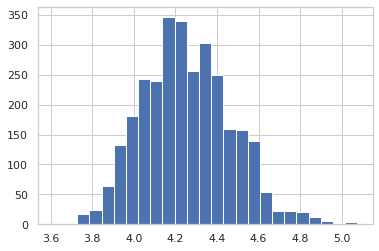

In [23]:
log_sample = np.log(amostra_peso)
plt.hist(x=log_sample, bins=25);

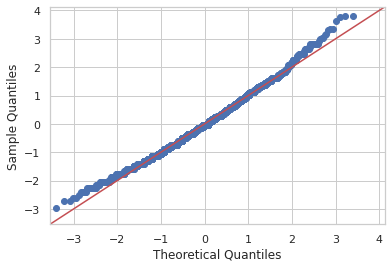

In [25]:
sml.qqplot(log_sample, fit=True, line='45');

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [29]:
nationality_bra = athletes[athletes['nationality']== 'BRA']
nationality_usa = athletes[athletes['nationality']== 'USA']
nationality_can = athletes[athletes['nationality']== 'CAN']

In [30]:
def q5():
    # Retorne aqui o resultado da questão 5.
    significancia = 0.05
    comp_bra_usa = sct.ttest_ind(nationality_bra['height'],nationality_usa['height'],
                   nan_policy='omit')[1]
                   
    return  comp_bra_usa > significancia

In [31]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [32]:
def q6():
    # Retorne aqui o resultado da questão 6.
    significancia = 0.05
    comp_bra_can = sct.ttest_ind(nationality_bra['height'], nationality_can['height'],                                     nan_policy='omit')[1]
    return comp_bra_can > significancia

In [33]:
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [19]:
def q7():
    # Retorne aqui o resultado da questão 7.
    significancia = 0.05
    ttest_usa_can = sct.ttest_ind(nationality_usa['height'], nationality_can['height'], 
                    equal_var=False,nan_policy='omit')

    return round(ttest_usa_can[1], 8)

In [ ]:
q7()

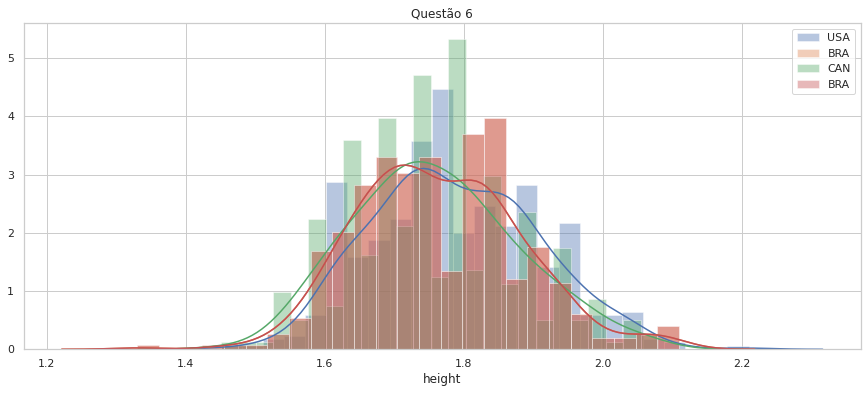

In [41]:
plt.figure(figsize=(15,6))
plt.title('Questão 5')
sns.distplot(nationality_usa['height'], kde=True, bins=25, label='USA')
sns.distplot(nationality_bra['height'], kde=True, bins=25, label='BRA')
plt.legend(loc='upper right')

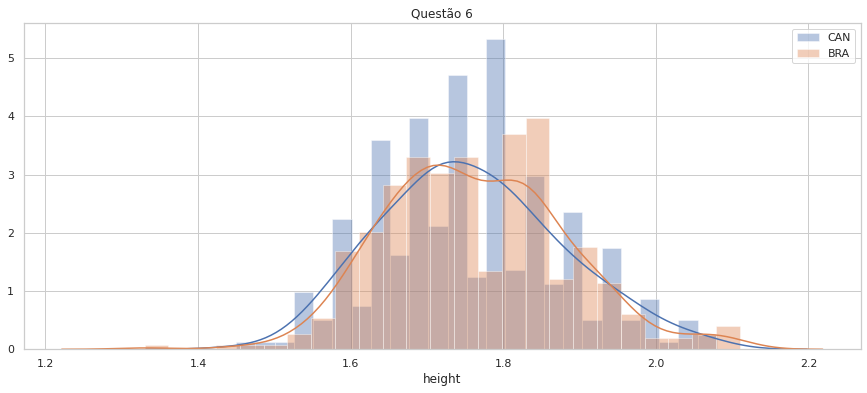

In [43]:
plt.figure(figsize=(15,6))
plt.title('Questão 6')
sns.distplot(nationality_can['height'], kde=True, bins=25, label='CAN')
sns.distplot(nationality_bra['height'], kde=True, bins=25, label='BRA')
plt.legend(loc='upper right')

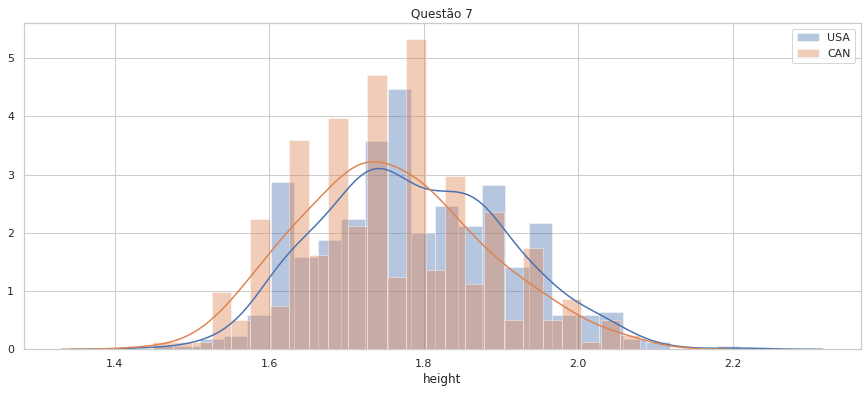

In [44]:
plt.figure(figsize=(15,6))
plt.title('Questão 7')
sns.distplot(nationality_usa['height'], kde=True, bins=25, label='USA')
sns.distplot(nationality_can['height'], kde=True, bins=25, label='CAN')
plt.legend(loc='upper right')

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?